In [3]:
# -*- coding:utf-8 -*-
import tensorflow as tf
import numpy as np
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets("/home/bigdatalab04/Downloads/Fashion-MNIST", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/bigdatalab04/Downloads/Fashion-MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/bigdatalab04/Downloads/Fashion-MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /home/bigdatalab04/Downloads/Fashion-MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /home/bigdatalab04/Downloads

In [20]:
sess = tf.InteractiveSession()
x = tf.placeholder('float', shape=[None, 784])
y_ = tf.placeholder('float', shape=[None, 10])
# W=tf.Variable(tf.zeros[784,10])
# b=tf.Variable(tf.zeros([10]))
sess.run(tf.global_variables_initializer())


/home/bigdatalab04/anaconda2/lib/python2.7/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [12]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

In [8]:
# 卷积函数的四个参数分别是训练图像，卷积核，步长，填充
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [9]:
# 求最大值池化，长宽缩小一半
def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [33]:
def add_layer(inputs, w_shape, b_shape, activation_function=None,mul_func = tf.matmul,pool=None):
#     Weights = tf.Variable(tf.random_normal([in_size, out_size]))
#     biases = tf.Variable(tf.zeros([1, out_size]))
    Weights = weight_variable(w_shape)
    biases = bias_variable(b_shape)
    Wx_plus_b = mul_func(inputs, Weights)+biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    
    if pool is None:
        outputs=outputs
    else:   
        outputs = pool(outputs)
        
    return outputs

In [15]:
w_shape1=[5,5,1,64]
b_shape1=[64]

In [27]:
x_image = tf.reshape(x,[-1,28,28,1])
out1 = add_layer(x_image,w_shape=w_shape1,
                 b_shape=b_shape1,mul_func=conv2d,
                 activation_function=tf.nn.relu, pool=max_pool_2x2)

In [30]:
w_shape2=[5,5,64,128]
b_shape2=[128]

In [31]:
out2 = add_layer(out1,w_shape=w_shape2,
                 b_shape=b_shape2,mul_func=conv2d,
                 activation_function=tf.nn.relu, pool=max_pool_2x2)

In [36]:
w_shape3=[7*7*128,1024]
b_shape3=[1024]

In [45]:
out2_flat = tf.reshape(out2,[-1,7*7*128])
out3 = add_layer(out2_flat,w_shape=w_shape3,
                 b_shape=b_shape3,
                 activation_function=tf.nn.relu)

# 随机关闭一些神经元防止过拟
keep_prob = tf.placeholder("float")
out3 = tf.nn.dropout(out3, keep_prob)

In [39]:
# 从1024个神经元映射到10个神经元
w_shape4 =[1024, 10]
b_shape4 = [10]

In [41]:
pred = add_layer(out3,w_shape4,b_shape4,tf.nn.softmax)

In [43]:
# 计算交叉熵损失
cross_entropy = -tf.reduce_sum(y_*tf.log(pred))
# 创建优化器
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
#计算准确率， tf.argmax函数 在 label 中找出数值最大的那个元素的下标
correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
sess.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [ ]:
for i in range(20000):
  batch = mnist.train.next_batch(50)
  if (i%100 == 0):
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print ("step %d, training accuracy %g"%(i, train_accuracy))
  # 运行训练模型
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print ("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.1
step 100, training accuracy 0.84


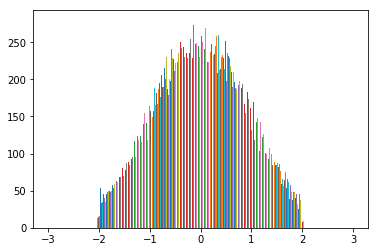

In [6]:
import matplotlib.pyplot as plt
A = tf.truncated_normal([10000, 10])
with tf.Session() as sess:
    a = sess.run(A)

plt.hist(a, 100, (-3, 3));